## <span style="color:darkblue">**Лабораторная работа 1. Поисковая оптимизация. Задание**</span> 

### Подключение библиотеки к своему проекту:

In [41]:
# подключение библиотек для выполнения задания
import numpy as np

import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# установка вывода графиков в окне jupiter
%matplotlib inline

## Практическое задание 1
В прикладной математике, тестовые функции, известные как искусственные ландшафты, являются полезными для оценки характеристик алгоритмов оптимизации, таких как:

    - Скорость сходимости;
    - Точность;
    - Робастность;
    - Общая производительность.

**Общая форма уравнения, область опредения целевой функции, границы переменные объекта и координаты глобального минимума:** 

**1. Функция Растригина** — невыпуклая функция, предложена в 1974 году Леонардом Растригиным как функция двух переменных и в 1991 году была обобщена на высшие размерности. Нахождение минимума этой функции является достаточно трудной задачей из-за большой области поиска и большого количества локальных минимумов:

$$f(x,y)=2*A+(x^2-A*cos(2\pi*x))+(y^2-A*cos(2\pi*y))\rightarrow min,\;A=10,\;x,y\in\left[-5.12;5.12\right]$$

**2. Функция Розенброка** (англ. Rosenbrock function, Rosenbrock's valley, Rosenbrock's banana function) — невыпуклая функция, предложенная Ховардом Розенброком (англ.) в 1960 году. Считается, что поиск глобального минимума для данной функции является нетривиальной задачей. Каноническое определение:

$$f(x,y)=(1-x)^2+100*(y-x^2)^2\rightarrow min,\;x,y\in[-\infty,\infty]$$

**3. Функция Химмельблау** (анг. Himmelblau) — мультимодальная функция двух переменных. Функция названа в честь Дэвида Мотнера Химельблау (1924—2011), который впервые её использовал. Определяется формулой:

$$f(x,y)=(x^2+y-11)^2 + (x+y^2-7)^2\rightarrow min,\;x,y\in\left[-5;5\right]$$

**4. Функция Де Янга** (анг. De Jong). Определяется формулой:

$$f(x,y)=3905.93-100*(x^2-y^2)^2-(1-x)^2 \rightarrow max,\;x,y\in\left[-2.048;2.048\right]$$


**5. Функция Стенгера** (анг. Stenger). Определяется формулой:

$$f(x,y)=(x^2-4y)^2+(x^2-2x+4y)^2 \rightarrow min,\;x,y\in\left[-1;4\right]$$

**6. Функция Мартина и Гадди** (анг. Martin, Gaddy). Определяется формулой:

$$f(x,y)=(x-y)^2+((x+y-10)/3)^2 \rightarrow min,\;x,y\in\left[-10;10\right]$$

**7. Функция Экли** (анг. Ackley). Определяется формулой:

$$f(x,y)=-20*e^{-0.2\sqrt{0.5(x^2+y^2)}} - e^{0.5(cos(2\pi*x)+cos(2\pi*y))} + 20 + e \rightarrow min,\;x,y\in\left[-100;100\right]$$

## **Задача:** 
- поиск минимума алгоритмов имитации отжига с использованием схемы Коши на заданной ландшафтной функции;
- поиск минимума алгоритмов имитации отжига с использованием схемы Больцмана на заданной ландшафтной функции.

***Описание алгоритма***

***Шаг 0.*** Выбирается стартовая точка $x_0$ и начальная температура $t_0$. Энергия системы $f(x_0)$.

***Шаг k-й итерации***:

***Шаг k.1.*** Выбираем случайное значение $x'\in D$ путем **небольшого** изменения $x_k$.

***Шаг k.2.*** Вычисляем значение энергии системы в новой точке $x'$.

***Шаг k.3.*** Сравнить текущую и новую энергию системы $f(x') ? f(x_k)$.

***Шаг k.3.1*** Если $f(x') \leq f(x_k)$, тогда $x_{k+1} = x'$.

***Шаг k.3.2*** Иначе: выбирается случайное значение $p\in[0,1]$ согласно закону нормального распределения. Следующее приблежение $x_{k+1}$ выбирается по следующему правилу:

$$x_{k+1}= \begin{cases} x', \; если\; p \leq A(x_k,x',t_k) \\ x_k \; иначе \end{cases}$$

***Шаг k.4.*** Пересчитываем температуру согласно схеме охлаждения $t_{k+1}$

***Шаг k.5.*** Проверяем условие остановки. Если условие не выполняется, $k=k+1$ и переход к шагу 1.

***Функция Метрополиса:***

$$A(x,x',t)=\min\{1, exp(-\frac{f(x')-f(x)}{t})\}$$

Функция Метрополиса принимает положительное решение о принятии очередного значения $x'$ в качестве нового приближения в случае, если оно уменьшает значение целевой функции $f$, т.е. если $f(x') \leq f(x)$

***Схема Больцмана:*** $t_{k+1}=\frac{t_0}{ln(1+k)}$

***Схема Коши:*** $t_{k+1}=\frac{t_0}{1+k}$

## Небольшая заготовка для выполнения Вашего задания:

Рассмотрим вопрос минимизации функции Бута:
$$F(x,y)=(x+2y-7)^2 + (x2+y-5)^2 \rightarrow min,\;где\;x,y\in\left[-10;10\right]$$

Минимум в точке (1, 3).

**Определим функцию:**

In [42]:
# определение функции
def FButa(x, y):
    A=10;
    return 2*A+(x*x-A*np.cos(2*np.pi*x))+(y*y-A*np.cos(2*np.pi*y));

In [43]:
import random

# случайная точка
def get_random(xrange, yrange, state = None):
    if (state is None):
        x,y = -5.12, -5.12;

        return x, y;
    
    x = state[0] + random.random() - .5;
    y = state[1] + random.random() - .5;
    return x, y;

# реализация алглоритма имитации отжига (схема Коши)
def simulated_annealing(f, xrange, yrange, fstate, initialTemperature, endTemperature):
    # список проверяемых точек
    lstate = [];
    
    # задаём начальное состояние, как случайную точку
    state = get_random(xrange, yrange, fstate);
    lstate.append(state);
    
    # вычисляем энергию для первого состояния
    currentEnergy = f(state[0], state[1]);
    
    # начальная температура
    T = initialTemperature
    
    for iterator in range(1, 100000):
        # получаем состояние-кандидат
        stateCandidate = get_random(xrange, yrange, state);
        
        # вычисляем его энергию
        candidateEnergy = f(stateCandidate[0], stateCandidate[1]);
        
        # разница между состояниями
        deltaEnergy = candidateEnergy - currentEnergy
        
        # если кандидат обладает меньшей энергией
        if (deltaEnergy < 0):
            # то он переходит в текущее состояние
            currentEnergy = candidateEnergy
            state = stateCandidate
        else:
            # иначе, считаем вероятность
            p = np.exp(-deltaEnergy/T)

            # и смотрим, осуществится ли переход
            if (np.random.rand() <= p):
                currentEnergy = candidateEnergy
                state = stateCandidate

        # уменьшаем температуру (схема Коши)
        T = initialTemperature / iterator; 

        # запись текущей точки
        lstate.append(state);
        
        # технологический вывод
        if iterator % 1000 == 0:
            print("Iteration #:%d, temperature:%f, cost:%.3f" % (iterator, T, currentEnergy))
        
        # условие выхода
        if T <= endTemperature:
            break
            
    return state, currentEnergy, lstate

In [44]:
# запуск алгоритма  
point, cost, lstate = simulated_annealing(FButa, (-5.12, 5.12), (-5.12, 5.12), None, 500, 0.1);

Iteration #:1000, temperature:0.500000, cost:35.998
Iteration #:2000, temperature:0.250000, cost:34.493
Iteration #:3000, temperature:0.166667, cost:34.008
Iteration #:4000, temperature:0.125000, cost:34.352
Iteration #:5000, temperature:0.100000, cost:33.904


In [45]:
print ('Минимум:{0} в точке ({1}, {2})'.format(cost, point[0], point[1]));

Минимум:33.903959449757124 в точке (-4.9589686975352745, -2.996644891237277)


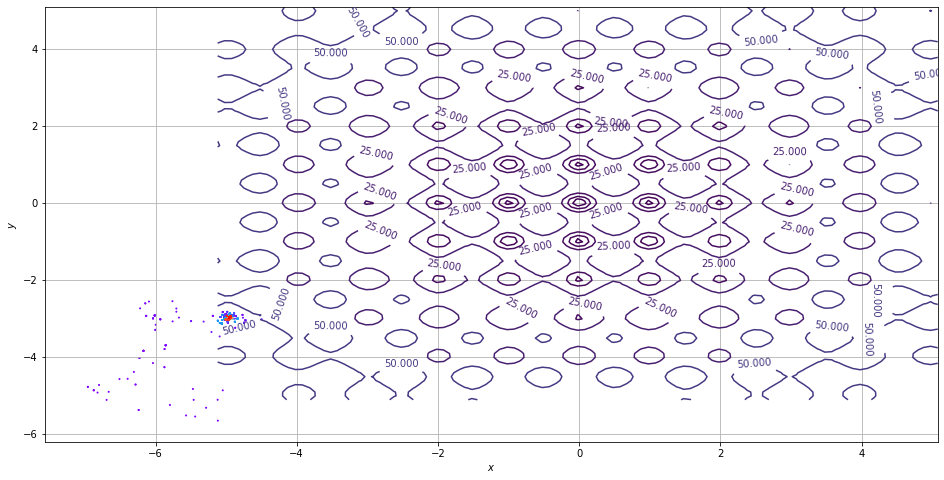

In [46]:
# установка размера графика
plt.rcParams['figure.figsize'] = (16,8) 

# создание графики
fig = plt.figure()

# определение данных
X = np.arange(-5.12, 5.12, .1)
Y = np.arange(-5.12, 5.12, .1)
X, Y = np.meshgrid(X, Y)

Z = FButa(X,Y)

# вывод функции (1)
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

# построение линий уровня
cs = ax.contour(X, Y, Z, [0,2,5,10,25,50,100,150,300]);

# вывод точек
p = np.array(lstate);
colors = cm.rainbow(np.linspace(0, 1, len(p)))
ax.scatter(p[:,0], p[:,1], s = 1, color = colors)

# добавление подписей к линиям уровня
ax.clabel(cs);

ax.grid();

plt.show()

Обратите внимание, что итоговая полученная оценка может быть "хуже", чем те, которые Вы получали в процессе решения.

**При желании:**
- попробуйте изменить функцию выбора следующей точки для поиска минимума;
- в качестве полученной оценки выдавать минимум полученный в ходе решения, а не значение функции в последнем шаге агента.

## Практическое задание 2

- Реализовать алгоритм метод роя частиц. 
- Решить задачу поисковой оптимизации с применение алгоритма метода роя частиц на заданной ландшафтной функции

<span style="color:darkred">**Описание алгоритма**</span>

Пусть задана функция $f:R^n \rightarrow R$, требуется найти глобальный минимум этой функции, т.е. точку $x_0$ такую, что $f(x_0) \leq f(x)$ для любого $x \in R^n$. Суть подхода, на котором основан метод роя частиц, заключается в том, что глобальный минимум функции $f$ ищется с помощью системы (роя), состоящей из $m$ частиц. Частицы выполняют поиск, перемещаясь по пространству решений $R^n$. Положение $i$-oй частицы задается вектором
$x \in R^n$, значение $f(x_i)$ определяет функцию качества этой частицы в текущий момент времени.

Каждая частица в рое обладает своей собственной скоростью $v_i \in R^n$, которая определяет как изменяются координаты частицы со временем: 

$$x_i \leftarrow x_i + \tau v_i$$
, где $\tau$ - некоторая единица измерения скорости (продолжительность одного такта работы алгоритма, например, можно положить $\tau = 1$). Последовательность (дискретная) положений $i$-ой частицы будем называть ее траекторией.

Ключевая особенность метода роя частиц заключается в способе обновления скорости отдельных частиц, которое выполняется по формуле:

$$v_i \leftarrow v_i + \alpha (p_i - x_i) + \beta (g - x_i)$$

Первое слагаемое в этой формуле представляет собой инерцию частицы - ее скорость на следующем временном шаге получается изменением текущей скорости.

Вектор <span style="color:darkred">$p_i$</span>, фигурирующий во втором слагаемом, служит простейшей моделью индивидуальной памяти - он равен лучшей точке траектории $i$-ой частицы за все время ее существования (от начала работы алгоритма до текущего момента времени). Говорят, что второе слагаемое реализует принцип простой ностальгии - каждая частица "хочет" вернуться в ту точку, где ею было достигнуто лучшее значение функции $f$.

Вектор <span style="color:darkred">$g$</span>, участвующий в вычислении третьего слагаемого, представляет собой лучшую точку, обнаруженной за время своего существования всем роем, т. е. представляет собою некую коллективную память. Следовательно, само третье слагаемое определяет некоторую простую схему социального взаимодействия между отдельными частицами роя.

Другими словами, изменение скорости каждой частицы (т.е. ее ускорение) определяется как некая взвешенная сумма двух векторов, первый из которых направлен на лучшую точку, обнаруженную данной частицей, а второй - на лучшую точку, обнаруженную всем роем. Коэффициенты $\alpha$ и $\beta$ могут выбираться из разных соображений. Численные эксперименты показали, что лучшей является вероятностная схема - либо оба коэффициента выбираются случайным образом из диапазона $[0,1]$, либо значение $\alpha$ выбирается случайным образом из этого диапазона, а значение
$\beta$ полагается равным $1-\alpha$.

<center><img src="PSOAlgo.png"></center>

Метод роя частиц является, по сути, метаэвристикой, хорошо зарекомендовавшей себя при решении различных оптимизационных задач. Его отличительной особенностью от многих других методов является то, что для метода роя частиц необходимо уметь вычислять только значение целевой функции, но не ее градиент. Т. е. функция, подлежащая оптимизации, не обязана быть дифференцируемой, более того, она может быть разрывной, зашумленной и т. п. С другой стороны, в силу того, что метод оперирует понятием скорости частиц, необходимым условием его применимости является непрерывность области определения функции. В частности, это означает, что данный метод неприменим напрямую к задачам дискретной оптимизации.

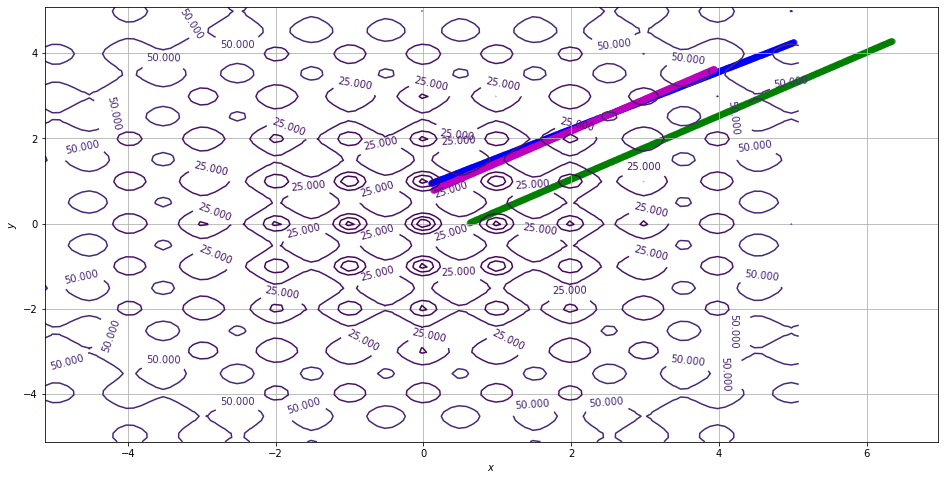

In [47]:
# установка размера графика
plt.rcParams['figure.figsize'] = (16,8) 

# создание графики
fig = plt.figure()

# вывод функции (1)
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

# построение линий уровня
cs = ax.contour(X, Y, Z, [0,2,5,10,25,50,100,150,300,450]);

# каждый агент - выделение цветом
colors = ['b', 'g', 'm']

# с разных точек
fstate = [(-5.12, -5.12), (5.12, 5.12), (-5.12, 5.12)];

# число агентов
m = 3;

# начальные координаты частиц
# - желательно раскидать по всему диапазону
state = np.random.random((m, 2));

# начальные скорости
v = np.random.random((m, 2)) / 100;

# цикл - поиска минимума
# сделал - по числу шагов - необходимо перевести на проверку минимума 
for it in range(1000):
    # перебор всех агентов
    for i in range(m):
        tau = 1.;
        state[i] = state[i] + tau * v[i]

        # графический вывод
        ax.scatter(state[i][0], state[i][1], c = colors[i], s = 40, lw = 0, alpha = 0.5)

# добавление подписей к линиям уровня
ax.clabel(cs);
ax.grid();

plt.show()

In [49]:
v

array([[0.00491753, 0.00331263],
       [0.00572747, 0.0042693 ],
       [0.00380705, 0.00284456]])